<a href="https://colab.research.google.com/github/nourhan412/Task2-First_model-technocolabs/blob/main/Task2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import libraries:** 

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Retrieve Data:**

In [206]:
data=pd.read_csv("/content/drive/MyDrive/Project/prosperLoanData.csv")
data.head()  #get the first five rows of the data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# **Data Manipulation:**

In [207]:
print(data.shape) #number of rows and columns
data.columns

(113937, 81)


Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [208]:
data.describe() # an abbreviation about the numeric data

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [209]:
data.info()   #some informations about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [210]:
data.duplicated().sum() #check the duplicates

0

# **Handling Dates:**

In [211]:
data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'], infer_datetime_format=True)
data['LoanOriginationDate']=pd.to_datetime(data['LoanOriginationDate'], infer_datetime_format=True)
data['ClosedDate']=pd.to_datetime(data['ClosedDate'], infer_datetime_format=True)
data['DateCreditPulled']=pd.to_datetime(data['DateCreditPulled'], infer_datetime_format=True)
data['FirstRecordedCreditLine']=pd.to_datetime(data['FirstRecordedCreditLine'], infer_datetime_format=True)

In [212]:
data['FirstRecordedCreditLineDateDay'] = data['FirstRecordedCreditLine'].dt.day
data['FirstRecordedCreditLineDateMonth'] = data['FirstRecordedCreditLine'].dt.month
data['FirstRecordedCreditLineDateYear'] = data['FirstRecordedCreditLine'].dt.year
data.drop('FirstRecordedCreditLine',axis=1, inplace= True)

In [213]:
data['DateCreditPulledDay'] = data['DateCreditPulled'].dt.day
data['DateCreditPulledMonth'] = data['DateCreditPulled'].dt.month
data['DateCreditPulledYear'] = data['DateCreditPulled'].dt.year
data.drop('DateCreditPulled',axis=1, inplace= True)

In [214]:
data['ClosedDateDay'] = data['ClosedDate'].dt.day
data['ClosedDateMonth'] = data['ClosedDate'].dt.month
data['ClosedDateYear'] = data['ClosedDate'].dt.year
data.drop('ClosedDate',axis=1, inplace= True)

In [215]:
data['LoanOriginationDateDay'] = data['LoanOriginationDate'].dt.day
data['LoanOriginationDateMonth'] = data['LoanOriginationDate'].dt.month
data['LoanOriginationDateYear'] = data['LoanOriginationDate'].dt.year
data.drop('LoanOriginationDate',axis=1, inplace= True)

In [216]:
data['ListingCreationDateDay'] = data['ListingCreationDate'].dt.day
data['ListingCreationDateMonth'] = data['ListingCreationDate'].dt.month
data['ListingCreationDateYear'] = data['ListingCreationDate'].dt.year
data.drop('ListingCreationDate',axis=1, inplace= True)

# **Select only that occur after jun 2009:**

In [217]:
data=data[(data['ListingCreationDateYear']>2009)|((data['ListingCreationDateYear']==2009) &(data['ListingCreationDateYear']>6))]
data

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,DateCreditPulledYear,ClosedDateDay,ClosedDateMonth,ClosedDateYear,LoanOriginationDateDay,LoanOriginationDateMonth,LoanOriginationDateYear,ListingCreationDateDay,ListingCreationDateMonth,ListingCreationDateYear
1,10273602499503308B223C1,1209647,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,2014,NaN,NaN,NaN,3,3,2014,27,2,2014
3,0EF5356002482715299901A,658116,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,2012,NaN,NaN,NaN,1,11,2012,22,10,2012
4,0F023589499656230C5E3E2,909464,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,2013,NaN,NaN,NaN,20,9,2013,14,9,2013
5,0F05359734824199381F61D,1074836,NaN,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,...,2013,NaN,NaN,NaN,24,12,2013,14,12,2013
6,0F0A3576754255009D63151,750899,NaN,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,...,2013,NaN,NaN,NaN,18,4,2013,12,4,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,NaN,36,Current,0.22354,0.1864,0.1764,0.16490,0.0699,...,2013,NaN,NaN,NaN,22,4,2013,14,4,2013
113933,E6DB353036033497292EE43,537216,NaN,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.10070,0.0200,...,2011,NaN,NaN,NaN,7,11,2011,3,11,2011
113934,E6E13596170052029692BB1,1069178,NaN,60,Current,0.23984,0.2150,0.2050,0.18828,0.1025,...,2013,NaN,NaN,NaN,23,12,2013,13,12,2013
113935,E6EB3531504622671970D9E,539056,NaN,60,Completed,0.28408,0.2605,0.2505,0.24450,0.0850,...,2011,13.0,8.0,2013.0,21,11,2011,14,11,2011


In [218]:
print(data['ListingCreationDateYear'].unique())
data['ListingCreationDateMonth'].unique()

[2014 2012 2013 2010 2011 2009]


array([ 2, 10,  9, 12,  4,  5,  7,  8, 11,  1,  6,  3])

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84881 entries, 1 to 113936
Data columns (total 91 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           84881 non-null  object 
 1   ListingNumber                        84881 non-null  int64  
 2   CreditGrade                          13 non-null     object 
 3   Term                                 84881 non-null  int64  
 4   LoanStatus                           84881 non-null  object 
 5   BorrowerAPR                          84881 non-null  float64
 6   BorrowerRate                         84881 non-null  float64
 7   LenderYield                          84881 non-null  float64
 8   EstimatedEffectiveYield              84853 non-null  float64
 9   EstimatedLoss                        84853 non-null  float64
 10  EstimatedReturn                      84853 non-null  float64
 11  ProsperRating (numeric)    

In [220]:
data['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

# **Create Target column:**

In [221]:
def fun (row):
    if row['LoanStatus']=='Completed':
        return 1
    else:
        return 0
data['BorrowerStatus']=data.apply(lambda row:fun(row),axis=1)

In [222]:
data['BorrowerStatus'].unique()

array([0, 1])

In [223]:
data.drop('LoanStatus',axis=1,inplace=True)
data.columns

Index(['ListingKey', 'ListingNumber', 'CreditGrade', 'Term', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months'

# **Handling Missing values:**

In [224]:
data.isnull().sum()[data.isnull().sum() > 0]

CreditGrade                            84868
EstimatedEffectiveYield                   28
EstimatedLoss                             28
EstimatedReturn                           28
ProsperRating (numeric)                   28
ProsperRating (Alpha)                     28
ProsperScore                              28
Occupation                              1333
EmploymentStatusDuration                  19
GroupKey                               82850
DebtToIncomeRatio                       7297
TotalProsperLoans                      65059
TotalProsperPaymentsBilled             65059
OnTimeProsperPayments                  65059
ProsperPaymentsLessThanOneMonthLate    65059
ProsperPaymentsOneMonthPlusLate        65059
ProsperPrincipalBorrowed               65059
ProsperPrincipalOutstanding            65059
ScorexChangeAtTimeOfListing            68214
LoanFirstDefaultedCycleNumber          78634
ClosedDateDay                          58848
ClosedDateMonth                        58848
ClosedDate

In [225]:
cols=list()
percent=list()
for col in range(data.shape[1]):
    if(data.isnull().sum()[col]>0):
        cols.append(data.columns[col])
        percent.append(data.isnull().sum()[col]/data.shape[0]*100)
merg={"column name":cols,"Percent %":percent}
output=pd.DataFrame(merg)
output

,column name,Percent %
0,CreditGrade,99.984684
1,EstimatedEffectiveYield,0.032987
2,EstimatedLoss,0.032987
3,EstimatedReturn,0.032987
4,ProsperRating (numeric),0.032987
5,ProsperRating (Alpha),0.032987
6,ProsperScore,0.032987
7,Occupation,1.570434
8,EmploymentStatusDuration,0.022384
9,GroupKey,97.607238


In [226]:
for x in range(len(output)):
  if output.loc[x,"Percent %"]>50.0:
    data.drop(output.iat[x,0],axis=1,inplace=True)
mis=data.isnull().sum()[data.isnull().sum() > 0]
mis

EstimatedEffectiveYield       28
EstimatedLoss                 28
EstimatedReturn               28
ProsperRating (numeric)       28
ProsperRating (Alpha)         28
ProsperScore                  28
Occupation                  1333
EmploymentStatusDuration      19
DebtToIncomeRatio           7297
dtype: int64

In [227]:
mis.index

Index(['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'Occupation', 'EmploymentStatusDuration', 'DebtToIncomeRatio'],
      dtype='object')

In [228]:
for x in mis.index:
  if data[x].dtype =='object':
    data[x].replace(np.nan,str(data[x].mode()),inplace=True) 
  elif data[x].dtype == 'int64' or data[x].dtype == 'float64' :
     data[x].replace(np.nan,data[x].mean(),inplace=True)
data.isnull().sum()[data.isnull().sum() > 0].sum()

0

# **Encode categories using OneHotEncoder:**

In [229]:
#Encoding
for col in range(data.shape[1]) :
    if data[data.columns[col]].dtype == 'object' :
        print(data.columns[col])

ListingKey
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
IncomeRange
LoanKey
LoanOriginationQuarter
MemberKey


In [230]:
data.drop('ProsperRating (Alpha)',axis=1,inplace=True) # it represented in numeric at ProsperRating (numeric)

In [231]:
for col in range(data.shape[1]) :
    if data[data.columns[col]].dtype == 'bool' :
        print(data.columns[col])

IsBorrowerHomeowner
CurrentlyInGroup
IncomeVerifiable


In [232]:
object_cols=['ListingKey','BorrowerState','Occupation','EmploymentStatus','IncomeRange','LoanKey','LoanOriginationQuarter','MemberKey',
             'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
for col in object_cols:
    print(f"{col}  {data[col].nunique()}")

ListingKey  84010
BorrowerState  48
Occupation  68
EmploymentStatus  7
IncomeRange  7
LoanKey  84010
LoanOriginationQuarter  20
MemberKey  68999
IsBorrowerHomeowner  2
CurrentlyInGroup  2
IncomeVerifiable  2


In [233]:
data.drop(['ListingKey','LoanKey','MemberKey'],axis=1,inplace=True)

In [234]:
object_cols=['BorrowerState','Occupation','EmploymentStatus','IncomeRange','LoanOriginationQuarter',
             'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
for col in range(len(object_cols)):
    tmp = onehotencoder.fit_transform(data[object_cols[col]].values.reshape(-1,1)).toarray()
    #To add this back into the original dataframe 
    OH_cols = pd.DataFrame(tmp, columns = [object_cols[col]+str(int(col)) for i in range(data[object_cols[col]].nunique())]) 
    # One-hot encoding removed index; put it back
    OH_cols.index = data.index
    # Remove categorical columns (will replace with one-hot encoding)
    num_cols = data.drop(object_cols[col], axis=1)
    # Add one-hot encoded columns to numerical features
    data = pd.concat([num_cols, OH_cols], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84881 entries, 1 to 113936
Columns: 221 entries, ListingNumber to IncomeVerifiable7
dtypes: float64(200), int64(21)
memory usage: 143.8 MB


In [235]:
data

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,IsBorrowerHomeowner5,IsBorrowerHomeowner5,CurrentlyInGroup6,CurrentlyInGroup6,IncomeVerifiable7,IncomeVerifiable7
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,1074836,60,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,10.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
6,750899,36,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [236]:
data.isnull().sum()[data.isnull().sum() > 0].sum()

0

# **Handling the outliers:**

In [237]:
#Using IQR method:-
for col in data.columns:
  x=data[col]
  Q1,Q3 = np.percentile(x, [25,75])
  IQR = Q3 - Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  data[col]= x[((x <= upper) | (x > lower))]
  data[col].replace(np.nan,data[col].mean(),inplace=True)

data

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,IsBorrowerHomeowner5,IsBorrowerHomeowner5,CurrentlyInGroup6,CurrentlyInGroup6,IncomeVerifiable7,IncomeVerifiable7
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,1074836,60,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,10.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
6,750899,36,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [238]:
data.isnull().sum()[data.isnull().sum() > 0].sum()

0

# **Data Selection using Mutual Inforamtion method:**

In [239]:
X = data.copy()
Y = X["BorrowerStatus"]
X.drop("BorrowerStatus",axis=1,inplace=True)
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X, Y, discrete_features)
selected=mi_scores[:21]  # show a few features with their MI scores
selected


LP_CustomerPrincipalPayments    0.493668
LP_CustomerPayments             0.217923
ListingNumber                   0.185577
LoanNumber                      0.185577
EstimatedEffectiveYield         0.181881
BorrowerAPR                     0.180142
LoanMonthsSinceOrigination      0.179576
EstimatedReturn                 0.168208
ListingCreationDateYear         0.168199
DateCreditPulledYear            0.167611
LoanOriginationDateYear         0.167465
BorrowerRate                    0.159232
EstimatedLoss                   0.155214
LenderYield                     0.153982
MonthlyLoanPayment              0.119950
LP_ServiceFees                  0.087758
LP_InterestandFees              0.066084
Investors                       0.063105
LoanOriginalAmount              0.062651
EmploymentStatus2               0.052641
Term                            0.043232
Name: MI Scores, dtype: float64

In [240]:
target=pd.DataFrame(Y)
target

,BorrowerStatus
1,0
3,0
4,0
5,0
6,0
...,...
113932,0
113933,0
113934,0
113935,1


In [241]:
best=[]
remain=[]
for x in selected.index:
  if selected[x] > 0.159:
    best.append(x)
  else:
    remain.append(x)
print(best)
print(remain)

['LP_CustomerPrincipalPayments', 'LP_CustomerPayments', 'ListingNumber', 'LoanNumber', 'EstimatedEffectiveYield', 'BorrowerAPR', 'LoanMonthsSinceOrigination', 'EstimatedReturn', 'ListingCreationDateYear', 'DateCreditPulledYear', 'LoanOriginationDateYear', 'BorrowerRate']
['EstimatedLoss', 'LenderYield', 'MonthlyLoanPayment', 'LP_ServiceFees', 'LP_InterestandFees', 'Investors', 'LoanOriginalAmount', 'EmploymentStatus2', 'Term']


In [242]:
best.append("BorrowerStatus")
best_features=data[best]
best_features

,LP_CustomerPrincipalPayments,LP_CustomerPayments,ListingNumber,LoanNumber,EstimatedEffectiveYield,BorrowerAPR,LoanMonthsSinceOrigination,EstimatedReturn,ListingCreationDateYear,DateCreditPulledYear,LoanOriginationDateYear,BorrowerRate,BorrowerStatus
1,0.00,0.0000,1209647,134815,0.07960,0.12016,0,0.05470,2014,2014,2014,0.0920,0
3,4091.09,5143.2000,658116,77296,0.08490,0.12528,16,0.06000,2012,2012,2012,0.0974,0
4,1563.22,2819.8500,909464,102670,0.18316,0.24614,6,0.09066,2013,2013,2013,0.2085,0
5,351.89,679.3400,1074836,123257,0.11567,0.15425,3,0.07077,2013,2013,2013,0.1314,0
6,604.25,1226.7000,750899,88353,0.23820,0.31032,11,0.11070,2013,2013,2013,0.2712,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2238.38,3647.4000,753087,88485,0.16490,0.22354,11,0.09500,2013,2013,2013,0.1864,0
113933,1997.16,2330.5500,537216,55801,0.10070,0.13220,28,0.08070,2011,2011,2011,0.1110,0
113934,183.15,546.7000,1069178,123122,0.18828,0.23984,3,0.08578,2013,2013,2013,0.2150,0
113935,15000.00,21122.5600,539056,56401,0.24450,0.28408,28,0.15950,2011,2011,2011,0.2605,1


In [243]:
data.drop(best,axis=1,inplace=True)

# **Data Extraction Using PCA:**

In [244]:
# Standardize
X_scaled = (data - data.mean(axis=0)) / data.std(axis=0)
from sklearn.decomposition import PCA
# Create principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=data.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
Term,0.065196,0.006476,-0.036735
LenderYield,-0.244335,0.236916,0.052919
EstimatedLoss,-0.246668,0.246411,0.059124
ProsperRating (numeric),0.250068,-0.256704,-0.055107
ProsperScore,0.173040,-0.247657,-0.059590
...,...,...,...
IsBorrowerHomeowner5,0.163009,0.086027,0.006861
CurrentlyInGroup6,0.020303,0.010134,-0.040137
CurrentlyInGroup6,-0.020303,-0.010134,0.040137
IncomeVerifiable7,-0.061971,-0.008215,0.191027


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd15697b390>,
      dtype=object)

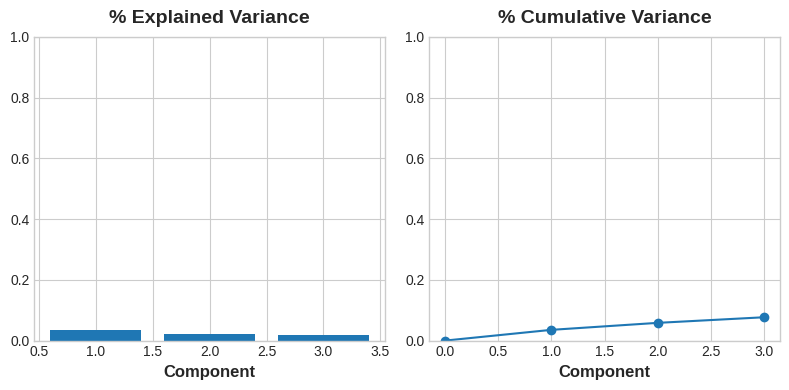

In [245]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca)

In [246]:
updated_data=pd.concat([best_features,X_pca],axis=1)
updated_data

,LP_CustomerPrincipalPayments,LP_CustomerPayments,ListingNumber,LoanNumber,EstimatedEffectiveYield,BorrowerAPR,LoanMonthsSinceOrigination,EstimatedReturn,ListingCreationDateYear,DateCreditPulledYear,LoanOriginationDateYear,BorrowerRate,BorrowerStatus,PC1,PC2,PC3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.450815,-0.133257,1.613154
1,0.00,0.0000,1209647.0,134815.0,0.07960,0.12016,0.0,0.05470,2014.0,2014.0,2014.0,0.0920,0.0,1.308220,-3.387306,-2.556916
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.993783,3.074295,-1.057508
3,4091.09,5143.2000,658116.0,77296.0,0.08490,0.12528,16.0,0.06000,2012.0,2012.0,2012.0,0.0974,0.0,6.159568,2.394786,-2.172360
4,1563.22,2819.8500,909464.0,102670.0,0.18316,0.24614,6.0,0.09066,2013.0,2013.0,2013.0,0.2085,0.0,-3.369797,0.094745,0.766917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2238.38,3647.4000,753087.0,88485.0,0.16490,0.22354,11.0,0.09500,2013.0,2013.0,2013.0,0.1864,0.0,NaN,NaN,NaN
113933,1997.16,2330.5500,537216.0,55801.0,0.10070,0.13220,28.0,0.08070,2011.0,2011.0,2011.0,0.1110,0.0,NaN,NaN,NaN
113934,183.15,546.7000,1069178.0,123122.0,0.18828,0.23984,3.0,0.08578,2013.0,2013.0,2013.0,0.2150,0.0,NaN,NaN,NaN
113935,15000.00,21122.5600,539056.0,56401.0,0.24450,0.28408,28.0,0.15950,2011.0,2011.0,2011.0,0.2605,1.0,NaN,NaN,NaN


In [247]:
updated_data.isnull().sum()[updated_data.isnull().sum() > 0].sum()

346304

In [248]:
data=updated_data
data

,LP_CustomerPrincipalPayments,LP_CustomerPayments,ListingNumber,LoanNumber,EstimatedEffectiveYield,BorrowerAPR,LoanMonthsSinceOrigination,EstimatedReturn,ListingCreationDateYear,DateCreditPulledYear,LoanOriginationDateYear,BorrowerRate,BorrowerStatus,PC1,PC2,PC3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.450815,-0.133257,1.613154
1,0.00,0.0000,1209647.0,134815.0,0.07960,0.12016,0.0,0.05470,2014.0,2014.0,2014.0,0.0920,0.0,1.308220,-3.387306,-2.556916
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.993783,3.074295,-1.057508
3,4091.09,5143.2000,658116.0,77296.0,0.08490,0.12528,16.0,0.06000,2012.0,2012.0,2012.0,0.0974,0.0,6.159568,2.394786,-2.172360
4,1563.22,2819.8500,909464.0,102670.0,0.18316,0.24614,6.0,0.09066,2013.0,2013.0,2013.0,0.2085,0.0,-3.369797,0.094745,0.766917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2238.38,3647.4000,753087.0,88485.0,0.16490,0.22354,11.0,0.09500,2013.0,2013.0,2013.0,0.1864,0.0,NaN,NaN,NaN
113933,1997.16,2330.5500,537216.0,55801.0,0.10070,0.13220,28.0,0.08070,2011.0,2011.0,2011.0,0.1110,0.0,NaN,NaN,NaN
113934,183.15,546.7000,1069178.0,123122.0,0.18828,0.23984,3.0,0.08578,2013.0,2013.0,2013.0,0.2150,0.0,NaN,NaN,NaN
113935,15000.00,21122.5600,539056.0,56401.0,0.24450,0.28408,28.0,0.15950,2011.0,2011.0,2011.0,0.2605,1.0,NaN,NaN,NaN


In [249]:
cols=list()
percent=list()
for col in range(data.shape[1]):
    if(data.isnull().sum()[col]>0):
        cols.append(data.columns[col])
        percent.append(data.isnull().sum()[col]/data.shape[0]*100)
merg={"column name":cols,"Percent %":percent}
output=pd.DataFrame(merg)
output

,column name,Percent %
0,LP_CustomerPrincipalPayments,20.318235
1,LP_CustomerPayments,20.318235
2,ListingNumber,20.318235
3,LoanNumber,20.318235
4,EstimatedEffectiveYield,20.318235
5,BorrowerAPR,20.318235
6,LoanMonthsSinceOrigination,20.318235
7,EstimatedReturn,20.318235
8,ListingCreationDateYear,20.318235
9,DateCreditPulledYear,20.318235


In [250]:
mis=data.isnull().sum()[data.isnull().sum() > 0]
for x in mis.index:
  if data[x].dtype =='object' or  x=='BorroweStatus':
    data[x].replace(np.nan,str(data[x].mode()),inplace=True) 
  elif data[x].dtype == 'int64' or data[x].dtype == 'float64' :
     data[x].replace(np.nan,data[x].mean(),inplace=True)
data.isnull().sum()[data.isnull().sum() > 0].sum()

0

In [251]:
data["BorrowerStatus"]=data["BorrowerStatus"].astype(bool)
data["BorrowerStatus"].unique()

array([ True, False])

# **Logistic Regression Model:**

In [252]:
from sklearn.model_selection import train_test_split
X =data
X.drop('BorrowerStatus',axis=1) 
y = data['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(X,y)

In [253]:
from sklearn import linear_model
model = linear_model.LogisticRegression(C=1,max_iter=2000, random_state=100)  #regularization parameters
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=2000, random_state=100)

In [254]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [False False False False False]
Accuracy:  0.7319014719134875


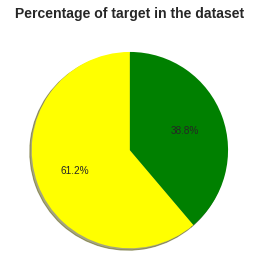

In [255]:
from matplotlib import pyplot as plt
sizes = data['BorrowerStatus'].value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [256]:
data['BorrowerStatus'].value_counts()

False    65192
True     41333
Name: BorrowerStatus, dtype: int64

# Balance the data:

In [257]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)


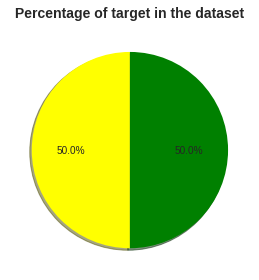

In [258]:
from matplotlib import pyplot as plt
sizes = y_rus.value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

# **Logistic Regression Model After Balancing:**

In [259]:
train_X,test_X,train_y,test_y = train_test_split(x_rus,y_rus)

In [260]:
from sklearn import linear_model
model = linear_model.LogisticRegression(C=10,max_iter=2000, random_state=100)  #regularization parameters
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=2000, random_state=100)

In [261]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [ True False  True  True  True]
Accuracy:  0.6834567184400252


# **Random Forest Model:**

In [262]:
from sklearn.ensemble import RandomForestClassifier
models= RandomForestClassifier(max_depth=5,n_jobs=4)
models.fit(train_X,train_y)

RandomForestClassifier(max_depth=5, n_jobs=4)

In [263]:
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [ True False  True  True  True]
Accuracy:  0.6834567184400252


In [264]:
#Done